# Practical Statistics for Data Scientists (Python)
# Chapter 3. Statistial Experiments and Significance Testing
> (c) 2019 Peter C. Bruce, Andrew Bruce, Peter Gedeck

Import required Python packages.

In [1]:
%matplotlib inline

from pathlib import Path
import random

import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import power

import matplotlib.pylab as plt

Define paths to data sets. If you don't keep your data in the same directory as the code, adapt the path names.

## 순열 검정 데이터 간략화 버전

![ex_screenshot](./image/photo_0.jpeg)

![ex_screenshot](./image/photo.png)

In [59]:
session_times = pd.DataFrame({'Type': ['A','A','B','B','A','B'],'Value':[1,3,4,7,8,9]})

In [60]:
session_times

,Type,Value
0,A,1
1,A,3
2,B,4
3,B,7
4,A,8
5,B,9


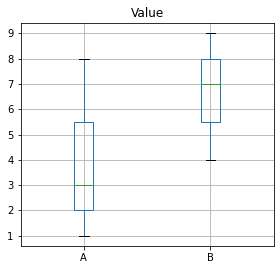

In [61]:
ax = session_times.boxplot(by='Type', column='Value',
                           figsize=(4, 4))
ax.set_xlabel('')
# ax.set_ylabel('Time (in seconds)')
plt.suptitle('')

plt.tight_layout()
plt.show()

In [64]:
mean_a = session_times[session_times.Type == 'A'].Value.mean()
mean_b = session_times[session_times.Type == 'B'].Value.mean()
print(mean_b - mean_a)

2.666666666666667


In [66]:
# Permutation test example with stickiness
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[idx_B].mean() - x.loc[idx_A].mean()
    
nA = session_times[session_times.Type == 'A'].shape[0]
nB = session_times[session_times.Type == 'B'].shape[0]
print(perm_fun(session_times.Value, nA, nB))

2.0


C:\Users\WJ\anaconda3\envs\aiffel\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  # This is added back by InteractiveShellApp.init_path()


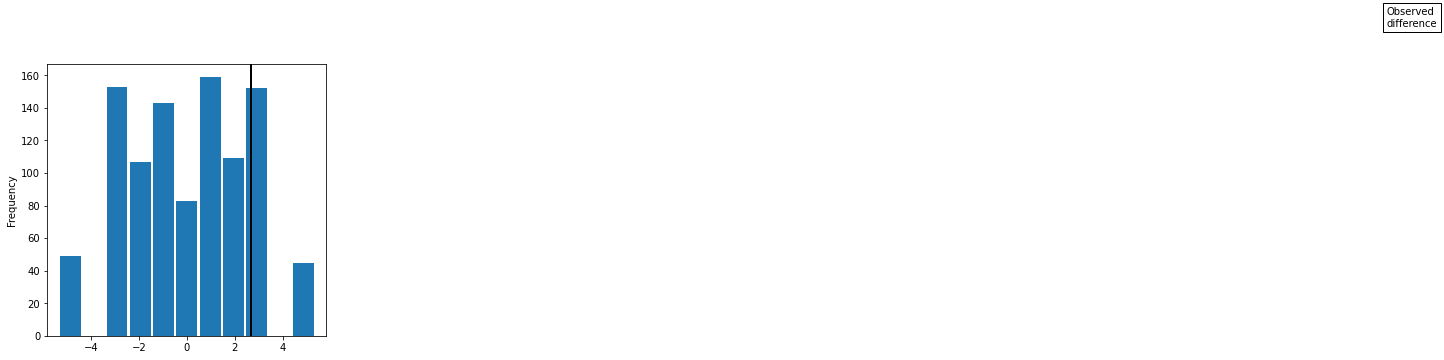

In [67]:
random.seed(1)
perm_diffs = [perm_fun(session_times.Value, nA, nB) for _ in range(1000)]

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x = mean_b - mean_a, color='black', lw=2)
ax.text(50, 190, 'Observed\ndifference', bbox={'facecolor':'white'})
# ax.set_xlabel('Session time differences (in seconds)')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [68]:
perm_diffs

[-2.666666666666667,
 -2.666666666666667,
 5.333333333333334,
 -3.3333333333333335,
 0.0,
 0.0,
 -5.333333333333334,
 -2.0,
 1.333333333333333,
 2.0,
 -2.0,
 2.0,
 -0.666666666666667,
 -2.666666666666667,
 0.0,
 -5.333333333333334,
 2.666666666666667,
 -0.666666666666667,
 2.0,
 0.0,
 2.0,
 -1.333333333333333,
 -2.0,
 0.0,
 1.333333333333333,
 -2.666666666666667,
 -2.666666666666667,
 5.333333333333334,
 2.666666666666667,
 -2.666666666666667,
 2.666666666666667,
 2.0,
 2.0,
 -2.0,
 1.333333333333333,
 2.666666666666667,
 0.666666666666667,
 -0.666666666666667,
 5.333333333333334,
 2.666666666666667,
 -2.0,
 0.0,
 2.666666666666667,
 -2.0,
 1.333333333333333,
 0.666666666666667,
 0.0,
 -2.666666666666667,
 -1.333333333333333,
 0.0,
 -0.666666666666667,
 2.666666666666667,
 2.666666666666667,
 0.0,
 2.666666666666667,
 -1.333333333333333,
 -5.333333333333334,
 0.0,
 -3.3333333333333335,
 -2.0,
 5.333333333333334,
 1.333333333333333,
 -2.666666666666667,
 2.0,
 0.666666666666667,
 0.0,
 

In [69]:
mean_b - mean_a

2.666666666666667

In [70]:
np.array(perm_diffs) > mean_b - mean_a

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False,  True,  True, False, False, False, False,  True, False,
       False,  True,

In [71]:
np.mean(np.array(perm_diffs) > mean_b - mean_a)

0.099

In [3]:
WEB_PAGE_DATA_CSV = './web_page_data.csv'

# 더 데이터가 많은 순열검정

In [4]:
session_times = pd.read_csv(WEB_PAGE_DATA_CSV)
session_times.Time = 100 * session_times.Time

In [21]:
session_times

,Page,Time
0,Page A,21.0
1,Page B,253.0
2,Page A,35.0
3,Page B,71.0
4,Page A,67.0
5,Page B,85.0
6,Page A,211.0
7,Page B,246.0
8,Page A,132.0
9,Page B,149.0


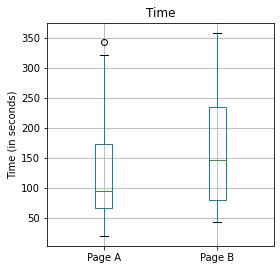

In [38]:
ax = session_times.boxplot(by='Page', column='Time',
                           figsize=(4, 4))
ax.set_xlabel('')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')

plt.tight_layout()
plt.show()

In [39]:
mean_a = session_times[session_times.Page == 'Page A'].Time.mean()
mean_b = session_times[session_times.Page == 'Page B'].Time.mean()
print(mean_b - mean_a)

35.66666666666667


R 코드에 비하면 A,B가 반대

In [40]:
# Permutation test example with stickiness
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[idx_B].mean() - x.loc[idx_A].mean()
    
nA = session_times[session_times.Page == 'Page A'].shape[0]
nB = session_times[session_times.Page == 'Page B'].shape[0]
print(perm_fun(session_times.Time, nA, nB))

-13.590476190476181


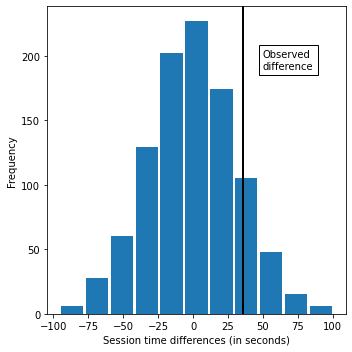

In [41]:
random.seed(1)
perm_diffs = [perm_fun(session_times.Time, nA, nB) for _ in range(1000)]

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x = mean_b - mean_a, color='black', lw=2)
ax.text(50, 190, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Session time differences (in seconds)')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [42]:
perm_diffs

[6.523809523809518,
 -17.59047619047618,
 22.866666666666674,
 -6.161904761904765,
 10.29523809523809,
 -9.019047619047626,
 5.838095238095235,
 -49.019047619047626,
 -7.6476190476190595,
 -14.733333333333348,
 -38.161904761904765,
 -19.876190476190487,
 53.26666666666668,
 39.55238095238097,
 -30.276190476190465,
 -39.076190476190476,
 -6.161904761904765,
 48.809523809523796,
 -49.81904761904762,
 25.609523809523807,
 -74.27619047619048,
 14.180952380952391,
 -65.59047619047618,
 -23.19047619047619,
 -17.70476190476191,
 55.89523809523811,
 42.98095238095239,
 15.666666666666686,
 6.980952380952402,
 -33.47619047619047,
 25.038095238095252,
 -13.819047619047637,
 1.3809523809523796,
 5.838095238095235,
 -46.27619047619048,
 -42.04761904761905,
 -13.933333333333337,
 -9.70476190476191,
 10.752380952380946,
 48.12380952380954,
 22.40952380952382,
 -11.533333333333331,
 16.695238095238096,
 -6.161904761904765,
 2.2952380952380906,
 20.46666666666667,
 -21.361904761904782,
 30.18095238095

In [43]:
mean_b - mean_a

35.66666666666667

In [44]:
np.array(perm_diffs) > mean_b - mean_a

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False,  True,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,

In [37]:
print(np.mean(np.array(perm_diffs) > mean_b - mean_a))

0.0


# Statistical Significance and P-Values

Observed difference: 0.0368%


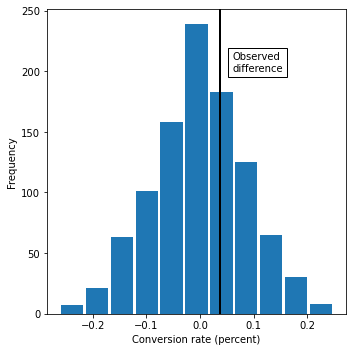

In [23]:
random.seed(1)
obs_pct_diff = 100 * (200 / 23739 - 182 / 22588)
print(f'Observed difference: {obs_pct_diff:.4f}%')
conversion = [0] * 45945
conversion.extend([1] * 382)
conversion = pd.Series(conversion)

perm_diffs = [100 * perm_fun(conversion, 23739, 22588) 
              for _ in range(1000)]

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x=obs_pct_diff, color='black', lw=2)
ax.text(0.06, 200, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Conversion rate (percent)')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## P-Value

np.mean는 list의 불리언에 적용하면 True는 1, False는 0으로 계산하기 때문에 전체에 대한 True의 비율 값을 반환한다. 

In [74]:
print(np.mean([diff > obs_pct_diff for diff in perm_diffs]))

0.465


여기서는 가설이 이항 분포를 따르기 때문에 p값을 근사할 수 있음.

In [75]:
survivors = np.array([[200, 23739 - 200], [182, 22588 - 182]])
chi2, p_value, df, _ = stats.chi2_contingency(survivors)

print(f'p-value for single sided test: {p_value / 2:.4f}')

p-value for single sided test: 0.3498


## Fisher's Exact Test
Scipy has only an implementation of Fisher's Exact test for 2x2 matrices. There is a github repository that provides a Python implementation that uses the same code as the R version. Installing this requires a Fortran compiler. 
```
stats.fisher_exact(clicks)
```

Fisher의 정확검정은 전체 순열검정의 일종으로 초기하 분포를 통해서 계산하기 때문에 실제 전체 순열을 바꾸지 않지만 모든 가능한 조합을 따져볼수 있기 때문에  정확검정이라고 불린다. (p.125)

In [28]:
from scipy.stats import hypergeom
table = np.array([[6, 2], [1, 4]])
M = table.sum()
n = table[0].sum()
N = table[:, 0].sum()
start, end = hypergeom.support(M, n, N)
hypergeom.pmf(np.arange(start, end+1), M, n, N)

array([0.01631702, 0.16317016, 0.40792541, 0.32634033, 0.08158508,
       0.004662  ])

In [29]:
from scipy.stats import fisher_exact

In [30]:
oddsr, p = fisher_exact(table, alternative='two-sided')

In [31]:
p

0.10256410256410257